In [2]:
import numpy as np
from urllib.request import urlopen
import scipy.optimize
import random
from sklearn import svm
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a


In [3]:
dataDir = "/Users/henryli/Desktop/CSE 258 Rec Sys/cse258/data/"
path = dataDir + "hotel_bookings_clean.csv"
df = pd.read_csv(path)

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'agent_is_null',
       'company_is_null'],
      dtype='object')

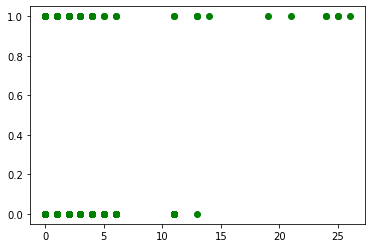

In [6]:
x_prev_cancel = df['previous_cancellations']
y_prev_cancel = df.is_canceled
prev_cancel_avg = [df['previous_cancellations'].mean()] *  y_prev_cancel.size
plt.plot(x_prev_cancel, y_prev_cancel, 'go')
#plt.plot(prev_cancel_avg, y_prev_cancel, 'red')
plt.show()

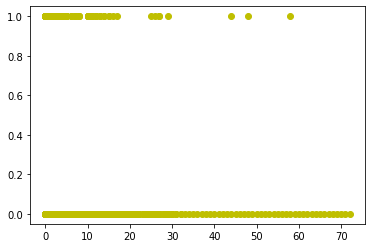

In [9]:
x_prev_not_cancel = df['previous_bookings_not_canceled']
y_label = df.is_canceled
#prev_not_cancel_avg = [df['previous_bookings_not_canceled'].mean()] *  y_prev_not_cancel.size
plt.plot(x_prev_not_cancel, y_label, 'yo')
plt.show()

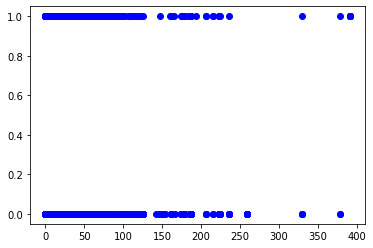

In [10]:
x_waitlist = df['days_in_waiting_list']
y_label = df.is_canceled
prev_not_cancel_avg = [df['days_in_waiting_list'].mean()] *  y_label
plt.plot(x_waitlist, y_label, 'bo')
plt.show()

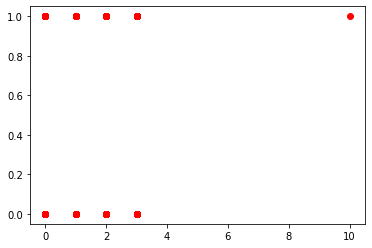

In [11]:
x_children = df['children']
y_labels = df.is_canceled
child_avg = [df['children'].mean()] *  y_labels.size
plt.plot(x_children, y_labels, 'ro')
#plt.plot(lead_time_avg, y_lead_time, 'red')
plt.show()

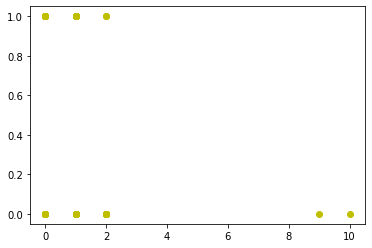

In [12]:
#no correlation 
x_babies = df['babies']
y_labels = df.is_canceled
babies_avg = [df['babies'].mean()] *  y_labels.size
plt.plot(x_babies, y_labels, 'yo')
#plt.plot(lead_time_avg, y_lead_time, 'red')
plt.show()

[22979, 982, 26]


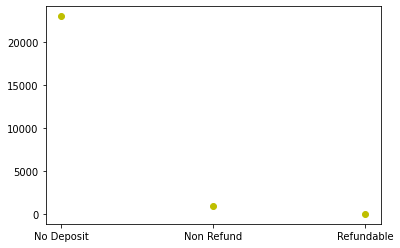

In [13]:
deposit = df.groupby(['deposit_type']).sum()['is_canceled']
x_deposit = ['No Deposit', 'Non Refund', 'Refundable']
y_deposit = [deposit[x] for x in x_deposit]
print(y_deposit)
plt.plot(x_deposit, y_deposit, 'yo')

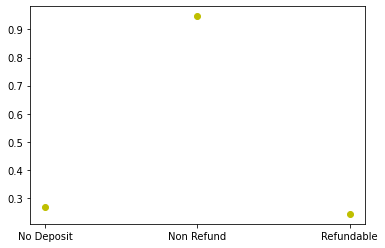

In [14]:
group_deposit = df.groupby(['deposit_type']).sum()['is_canceled']
group_deposit_total =df.groupby(['deposit_type']).count()['is_canceled']
prob_cancel_deposit = np.array(group_deposit/group_deposit_total)
x_deposit = np.sort(pd.unique(df['deposit_type']))
plt.plot(x_deposit, prob_cancel_deposit, 'yo')
plt.show()

In [15]:
#having 2 children is twice as likely to cancel 
group_child = df.groupby(['children']).sum()['is_canceled']
group_child_total =df.groupby(['children']).count()['is_canceled']
print(group_child/group_child_total)
print(group_child_total)

children
0.0     0.267245
1.0     0.312633
2.0     0.418546
3.0     0.213333
10.0    1.000000
Name: is_canceled, dtype: float64
children
0.0     78587
1.0      4686
2.0      3591
3.0        75
10.0        1
Name: is_canceled, dtype: int64


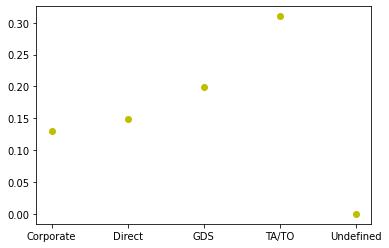

In [26]:
group_dist = df.groupby(['distribution_channel']).sum()['is_canceled']
group_dist_total =df.groupby(['distribution_channel']).count()['is_canceled']
prob_dist = np.array(group_dist/group_dist_total)
x_dist_ch = np.sort(pd.unique(df['distribution_channel']))
plt.plot(x_dist_ch, prob_dist, 'yo')
plt.show()

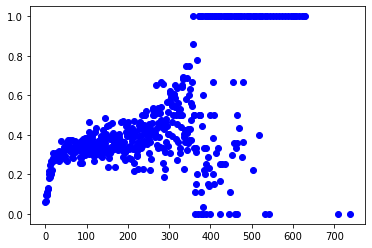

In [17]:
#no correlation
group_lead = df.groupby(['lead_time']).sum()['is_canceled']
group_lead_total =df.groupby(['lead_time']).count()['is_canceled']
prob_cancel_lead_time = np.array(group_lead/group_lead_total)
x_lead_time = np.sort(pd.unique(df['lead_time']))
y_labels = df.is_canceled
plt.plot(x_lead_time, prob_cancel_lead_time, 'bo')
plt.show()

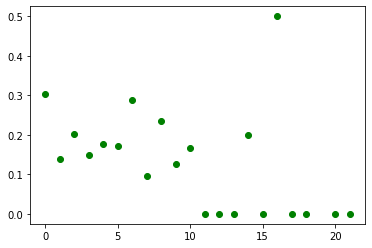

In [18]:
#number of changes
group_book_changes = df.groupby(['booking_changes']).sum()['is_canceled']
group_book_changes_total =df.groupby(['booking_changes']).count()['is_canceled']
prob_cancel_book_changes = np.array(group_book_changes/group_book_changes_total)
x_booking_changes = np.sort(pd.unique(df['booking_changes']))
y_labels = df.is_canceled
plt.plot(x_booking_changes, prob_cancel_book_changes, 'go')
plt.show()

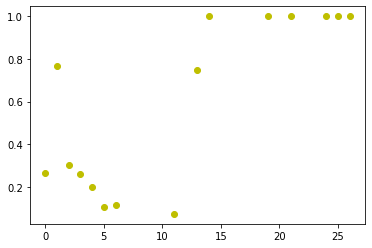

In [19]:
group_prev_cancel = df.groupby(['previous_cancellations']).sum()['is_canceled']
group_prev_cancel_total =df.groupby(['previous_cancellations']).count()['is_canceled']
prob_cancel_prev_cancel = np.array(group_prev_cancel/group_prev_cancel_total)
x_prev_cancel = np.sort(pd.unique(df['previous_cancellations']))
plt.plot(x_prev_cancel, prob_cancel_prev_cancel, 'yo')
plt.show()

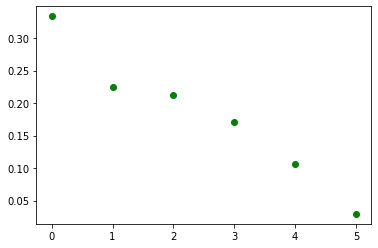

In [21]:
group_req = df.groupby(['total_of_special_requests']).sum()['is_canceled']
group_req_total =df.groupby(['total_of_special_requests']).count()['is_canceled']
prob_req = np.array(group_req/group_req_total)
x_req = np.sort(pd.unique(df['total_of_special_requests']))
plt.plot(x_req, prob_req, 'go')
plt.show()

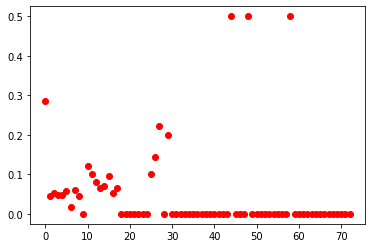

In [27]:
group_prev_not = df.groupby(['previous_bookings_not_canceled']).sum()['is_canceled']
group_prev_not_total =df.groupby(['previous_bookings_not_canceled']).count()['is_canceled']
prob_prev_not = np.array(group_prev_not/group_prev_not_total)
x_prev_not = np.sort(pd.unique(df['previous_bookings_not_canceled']))
plt.plot(x_prev_not, prob_prev_not, 'ro')
plt.show()

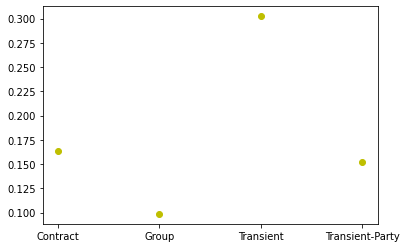

In [30]:
group_cust = df.groupby(['customer_type']).sum()['is_canceled']
group_cust_total =df.groupby(['customer_type']).count()['is_canceled']
prob_cust = np.array(group_cust/group_cust_total)
x_cust = np.sort(pd.unique(df['customer_type']))
plt.plot(x_cust, prob_cust, 'yo')
plt.show()


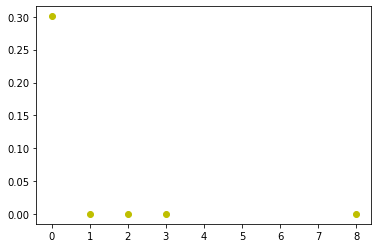

In [110]:
group_park = df.groupby(['required_car_parking_spaces']).sum()['is_canceled']
group_park_total =df.groupby(['required_car_parking_spaces']).count()['is_canceled']
prob_park = np.array(group_park/group_park_total)
x_park = np.sort(pd.unique(df['required_car_parking_spaces']))
plt.plot(x_park, prob_park, 'yo')
plt.show()

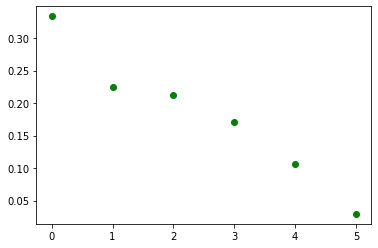

In [74]:
group_req = df.groupby(['total_of_special_requests']).sum()['is_canceled']
group_req_total =df.groupby(['total_of_special_requests']).count()['is_canceled']
prob_req = np.array(group_req/group_req_total)
x_req = np.sort(pd.unique(df['total_of_special_requests']))
plt.plot(x_req, prob_req, 'go')
plt.show()

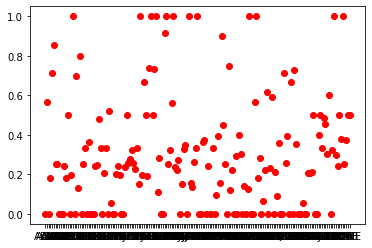

In [36]:
group_country = df.groupby(['country']).sum()['is_canceled']
group_country_total =df.groupby(['country']).count()['is_canceled']
prob_country = np.array(group_country/group_country_total)
x_country = np.sort(pd.unique(df['country']))
plt.plot(x_country, prob_country, 'ro')
plt.show()

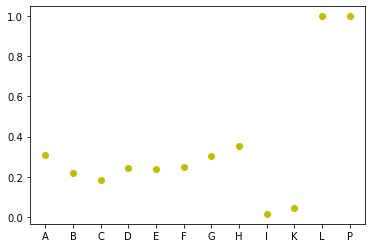

In [102]:
group_assign_room = df.groupby(['assigned_room_type']).sum()['is_canceled']
group_assign_room_total =df.groupby(['assigned_room_type']).count()['is_canceled']
prob_assign_room = np.array(group_assign_room/group_assign_room_total)
x_assign_room = np.sort(pd.unique(df['assigned_room_type']))
plt.plot(x_assign_room, prob_assign_room, 'yo')
plt.show()

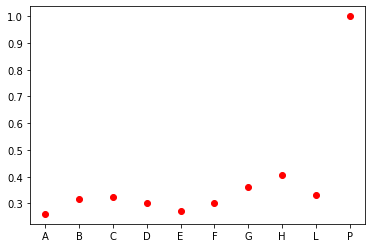

In [107]:

group_res_room = df.groupby(['reserved_room_type']).sum()['is_canceled']
group_res_room_total =df.groupby(['reserved_room_type']).count()['is_canceled']
prob_res_room = np.array(group_res_room/group_res_room_total)
x_res_room = np.sort(pd.unique(df['reserved_room_type']))
plt.plot(x_res_room, prob_res_room, 'ro')
plt.show()

In [130]:
group_country_total

country
ABW      2
AGO    342
AIA      1
ALB     11
AND      7
      ... 
VGB      1
VNM      8
ZAF     78
ZMB      2
ZWE      4
Name: is_canceled, Length: 177, dtype: int64

In [60]:
#start changing the data
group_country_total =df.groupby(['country']).count()['is_canceled']
new_group_total = list(group_country_total[group_country_total < 40].index)
no_country_df = df[~df['country'].isin(new_group_total)]

In [61]:
no_country_df.size

2922674

In [68]:
df.size

2955960

In [64]:
no_undefined = df[df.distribution_channel != 'Undefined']

In [72]:
no_undefined.size

2955926

In [95]:
no_undefined2 = no_undefined[no_undefined['children'] != 10]

In [96]:
no_undefined2.size

2955926

In [89]:
no_undefined[no_undefined['children']== 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_is_null,company_is_null
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,1,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86935,City Hotel,0,23,2017,August,35,30,2,5,2,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,0,1
86936,City Hotel,0,102,2017,August,35,31,2,5,3,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,0,1
86937,City Hotel,0,34,2017,August,35,31,2,5,2,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,0,1
86938,City Hotel,0,109,2017,August,35,31,2,5,2,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,0,1


In [90]:
group_child_total

children
0.0     78587
1.0      4686
2.0      3591
3.0        75
10.0        1
Name: is_canceled, dtype: int64

In [91]:
df[df.distribution_channel == 'Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_is_null,company_is_null
10977,Resort Hotel,0,103,2015,July,28,5,2,3,2,...,NaN,0,Transient,112.7,1,2,Check-Out,2015-07-10,1,1


In [97]:
no_child = df[df['children']!= 10]

In [98]:
no_child.size

2955926

In [100]:
no_child = no_child[no_child['distribution_channel'] != 'Undefined']

In [101]:
no_child.size

2955892

In [120]:
def features_to_encode_and_bind(features_to_encode, dataframe):
    for feature in features_to_encode:
        dummies = pd.get_dummies(dataframe[[feature]])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([feature], axis=1)
    return df

#[(column, value)]
def features_to_removed(features_to_remove, dataframe):
    new_df = dataframe.copy()
    for column, value in features_to_remove:
        new_df = new_df[new_df[column] != value]
    return new_df

In [112]:
df.size

2955960

In [127]:
removed_outliers = features_to_removed( [('children',10),('distribution_channel','Undefined'),('assigned_room_type','L'),('assigned_room_type','P'),('reserved_room_type','P')] , df)

In [128]:
removed_outliers.size

2955858

In [129]:
df[df['assigned_room_type']=='P']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,agent_is_null,company_is_null
51674,City Hotel,1,0,2017,August,32,11,0,0,0,...,NaN,0,Transient,0.0,0,0,Canceled,2017-08-11,1,1
